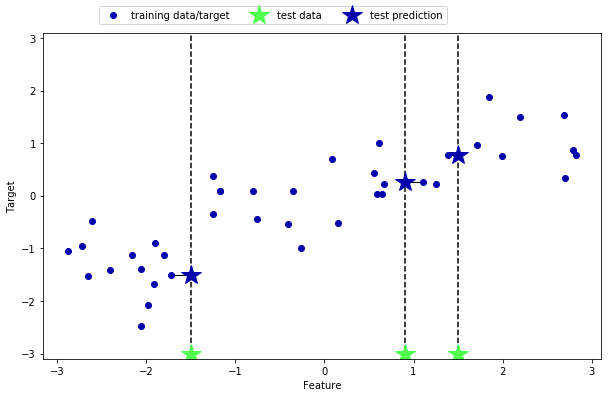

In [3]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

mglearn.plots.plot_knn_regression(n_neighbors=1)

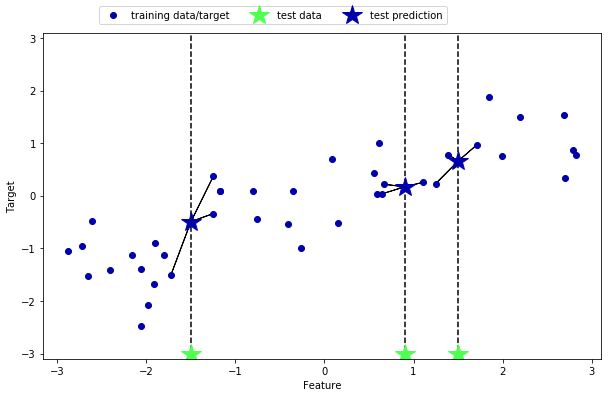

In [4]:
#KNN 회귀
#이웃을 둘 이상 사용하여 회귀분석이 가능하다. 
#예측 = 여러 개의 최근접 이웃간의 평균이 예측값
mglearn.plots.plot_knn_regression(n_neighbors=3)

test prediction : [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]

test reg prediction : 0.8344172446249604


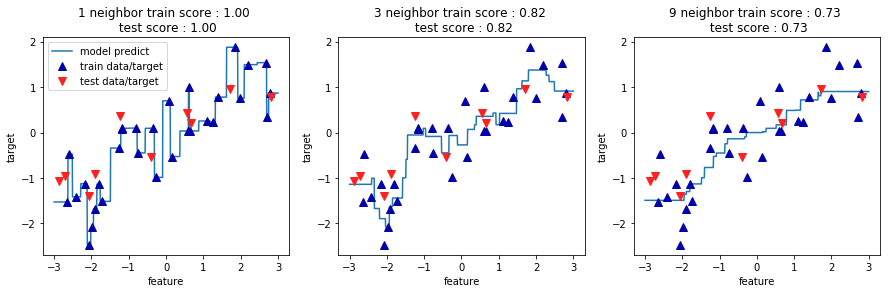

In [16]:
#sklearn에 knn regression이 구현되 있음
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

x,y = mglearn.datasets.make_wave(n_samples=40)
#wave 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

#이웃의 수를 3으로 하여 모델의 객체를 만듬
reg = KNeighborsRegressor(n_neighbors=3)

#훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다.
reg.fit(x_train, y_train)

print("test prediction : {}".format(reg.predict(x_test)))

#score 메서드를 사용해 모델평가 가능
#이 메서드는 회귀일 땐 R^2값을 반환
print("\ntest reg prediction : {}".format(reg.score(x_test,y_test)))

fig, axes = plt.subplots(1, 3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    #1,3,9 이웃을 사용한 예측
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(x_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(x_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbor train score : {:.2f} \n test score : {:.2f}".format(n_neighbors,reg.score(x_train,y_train),\
                                                                                    reg.score(x_train,y_train)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    
    axes[0].legend(["model predict", "train data/target","test data/target"],loc= "best")
    